In [ ]:
"""
https://github.com/sdpython/ensae_teaching_cs/blob/master/_doc/notebooks/
sklearn_ensae_course/08_validation_and_learning_curves.ipynb

Notebook created from content in Andrew Ng's Coursera course
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# example of bias-variance trade-off with a 1D regression problem
X = np.c_[.5, 1].T
y = [.5, 1]
X_test = np.c_[0, 2].T

In [3]:
X

array([[0.5],
       [1. ]])

In [4]:
y

[0.5, 1]

In [5]:
X_test

array([[0],
       [2]], dtype=int32)

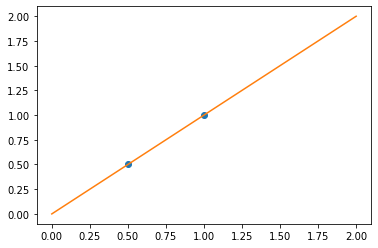

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X, y)
plt.plot(X, y, 'o')
plt.plot(X_test, regr.predict(X_test))

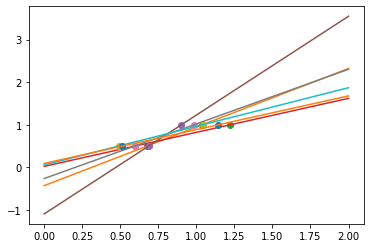

In [7]:
# emulate real-life situation with noise in the data

np.random.seed(0)
for _ in range(6):
    noise = np.random.normal(loc=0, scale=.1, size=X.shape)
    noisy_X = X + noise
    plt.plot(noisy_X, y, 'o')
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test))

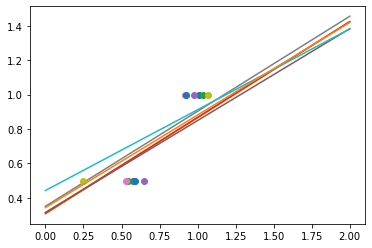

In [9]:
# use Ridge estimator to regularize coefficients by shrinking them to zero
regr = linear_model.Ridge(alpha=.1)
for _ in range(6):
    noise = np.random.normal(loc=0, scale=.1, size=X.shape)
    noisy_X = X + noise
    plt.plot(noisy_X, y, 'o')
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test))

In [10]:
# this estimator displays less vairance, but under-estimates the coefficient

In [14]:
# Bias/Variance Tradeoff with Learning Curves
def test_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

def compute_error(x, y, p):
    yfit = np.polyval(p, x)
    return np.sqrt(np.mean((y - yfit) ** 2))

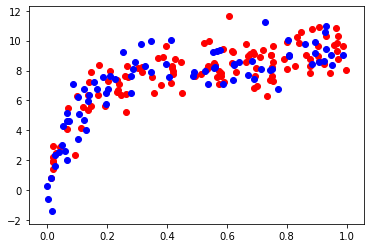

In [15]:
from sklearn.model_selection import train_test_split

N = 200
test_size = 0.4
error = 1.0

# randomly sample the data
np.random.seed(1)
x = np.random.random(N)
y = test_func(x, error)

# split into training, validation, and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=test_size)

# show the training and validation sets
plt.scatter(xtrain, ytrain, color='red')
plt.scatter(xtest, ytest, color='blue')

Text(0, 0.5, 'rms error')

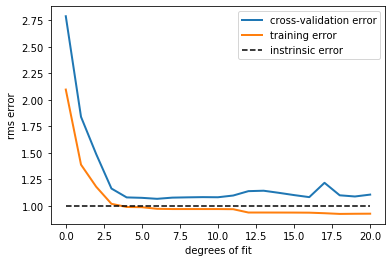

In [18]:
# visualizing the validation error of the polynomial classifier by plotting the error
# as a function of the polynomial degree, d

# suppress warnings from Polyfit
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

degrees = np.arange(21)
train_err = np.zeros(len(degrees))
validation_err = np.zeros(len(degrees))

for i, d in enumerate(degrees):
    p = np.polyfit(xtrain, ytrain, d)
    
    train_err[i] = compute_error(xtrain, ytrain, p)
    validation_err[i] = compute_error(xtest, ytest, p)
    
fig, ax = plt.subplots()

ax.plot(degrees, validation_err, lw=2, label = 'cross-validation error')
ax.plot(degrees, train_err, lw=2, label = 'training error')
ax.plot([0, 20], [error, error], '--k', label = 'instrinsic error')

ax.legend(loc = 0)
ax.set_xlabel('degrees of fit')
ax.set_ylabel('rms error')